In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate

In [0]:
x = pd.read_csv('X_opening.csv')
y = x['worldwide_gross']
x = x.drop('worldwide_gross', axis=1)

En esta prueba el mejor resultó ser gradient tree boosting y despues random forest. Ambos de la familia de los árboles. Probaremos con un árbol como modelo.

![Performance de algunos modelos](https://crossinvalidation.files.wordpress.com/2017/08/olson.jpg?w=600)

# **Desicion trees**

---



In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
# Max depth nos indica la altura maxima del arbol. En este caso 2 para hacer una visualizacion.
model = DecisionTreeRegressor(max_depth=2)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [0]:
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
# Para visualizacion de arboles
import graphviz
from sklearn.tree import export_graphviz

In [0]:
# out_file, para si lo quieres guardar
# feature_names, son los nombres de los features utilizados para el arbol
treedot = export_graphviz(model, out_file=None, feature_names=x.columns)

In [0]:
treedot

'digraph Tree {\nnode [shape=box] ;\n0 [label="opening_gross <= 41613376.0\\nmse = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nmse = 1.3333822193127848e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 4923666241203532.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="mse = 3.147813101998783e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nmse = 1.103981187159358e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="mse = 4.067538845924512e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="mse = 1.2226485798747597e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

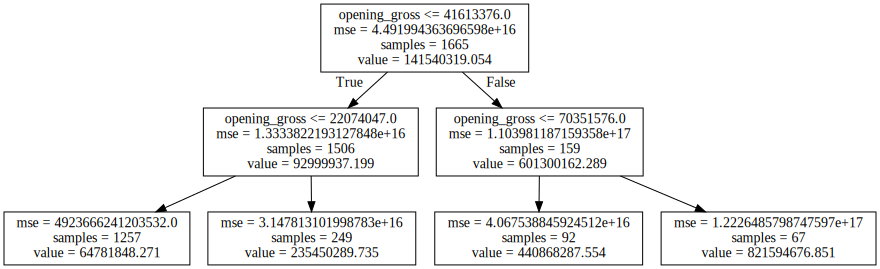

In [0]:
# visualizacion del arbol con graphviz
graphviz.Source(treedot)

Nota: Los árboles no necesitan rescalamiento para la clasificación.

# **Ensembles**

---



In [0]:
# Modelo random forest
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Instancia del modelo con 200 árboles que votarán
forest = RandomForestRegressor(200)

In [0]:
results = cross_validate(forest, x, y, scoring='r2', cv=5, return_train_score=True)

In [0]:
test_scores = results['test_score']
train_scores = results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores))

0.5221640522660482
0.9652477125578063


**Leo Breiman** creador del Random Forest demostró que un ensemble podía tener buen poder de generalización sí:
1. Los submodelos tienen buen poder de predicción (P.e. Poor man's ensembles)
2. Los submodelos están descorrelacionados (P.e. Random forest)

# **Gradient Boosted Trees**

---



In [0]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, x, y, cv=5, scoring='r2', return_train_score=True)

In [0]:
test_scores = results['test_score']
train_scores = results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores))

0.5224735266797544
0.9151392143549633


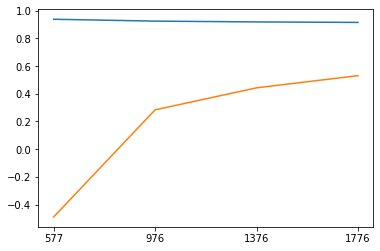

In [0]:
from sklearn.model_selection import learning_curve
results = learning_curve(GradientBoostingRegressor(), x, y, cv=5)

plt.plot(np.mean(results[1], axis=1)[1:])
plt.plot(np.mean(results[2], axis=1)[1:])
plt.xticks(np.arange(results[0].shape[0]-1), results[0][1:])
plt.show()

# **Optimización de Hiperparámetros**

---



Flujo de trabajo normal en el machine learning

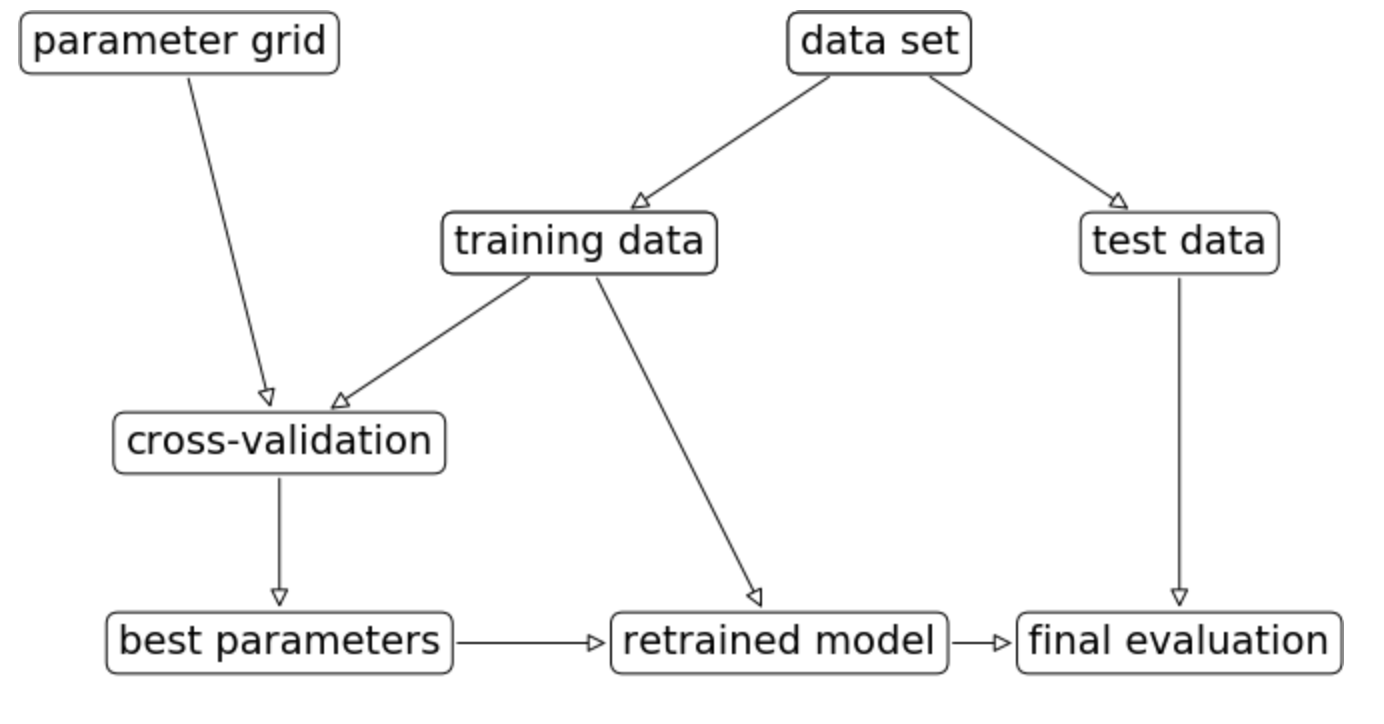

GridSearch utiliza una grilla para encontrar los mejores parámetros para el modelo.

In [0]:
# Separacion de datos inicial
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [0]:
# GridSearchCV (Grid search que utiliza CV [cross validation])
from sklearn.model_selection import GridSearchCV

In [0]:
# Parametros a probar con diferentes valores (puede soportar variar mas de un valor)
param_test1 = {'n_estimators': range(20, 501, 20)}

In [0]:
# Optimizaremos GradientBoostingRegressor:
#   Valores fijados segun investigacion propia
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10)

In [0]:
# Uso del grisSearch con el estimador utilizando la grilla ya definida
gsearch1 = GridSearchCV(estimator, param_grid=param_test1, scoring='r2', cv=5)

In [0]:
# Entrenamiento del grid search con los valores de entrenamiento (pues seguimos el flujo de trabajo indicado anteriormente)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features='sqrt',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
           

In [0]:
list(zip(gsearch1.cv_results_['mean_test_score'], gsearch1.cv_results_['std_test_score'], gsearch1.cv_results_['params']))

[(0.6553377167287445, 0.057637232303888744, {'n_estimators': 20}),
 (0.7194707183052497, 0.06255974658122894, {'n_estimators': 40}),
 (0.7347239263041044, 0.06359927761595936, {'n_estimators': 60}),
 (0.7389339055742862, 0.062364772765764395, {'n_estimators': 80}),
 (0.7420485206288182, 0.06271425977283827, {'n_estimators': 100}),
 (0.7459322395926498, 0.06235500960463639, {'n_estimators': 120}),
 (0.7495406754127887, 0.06335029572288614, {'n_estimators': 140}),
 (0.7508197586274828, 0.0630468837559907, {'n_estimators': 160}),
 (0.7525654539309128, 0.0634404813604329, {'n_estimators': 180}),
 (0.753490598609423, 0.06446653281824148, {'n_estimators': 200}),
 (0.7545692717605134, 0.06341510679393178, {'n_estimators': 220}),
 (0.7553059694284987, 0.06488882352873111, {'n_estimators': 240}),
 (0.7551714860288669, 0.06572082397934953, {'n_estimators': 260}),
 (0.753885223323653, 0.06495415209551622, {'n_estimators': 280}),
 (0.7546023133872946, 0.06568746888772704, {'n_estimators': 300}),
 

In [0]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 240}, 0.7553059694284987)

El mejor número de estimadores fue 240

In [0]:
# Devuelve el estimador ya con los mejores parametros
final_estimator = gsearch1.best_estimator_

In [0]:
 final_results = cross_validate(final_estimator, x_train, y_train, scoring='r2', cv=5, return_train_score=True)

In [0]:
test_scores = final_results['test_score']
train_scores = final_results['train_score']

print(np.mean(test_scores))
print(np.mean(train_scores)) 
# Buen score con cross validation

0.7553059694284988
0.8286608694466742


**Evaluación final**
---

In [0]:
estimator = GradientBoostingRegressor(learning_rate=0.1, 
                                       min_samples_split=500,
                                       min_samples_leaf=50,
                                       max_depth=8,
                                       max_features='sqrt',
                                       subsample=0.8,
                                       random_state=10,
                                       n_estimators=240)

In [0]:
estimator.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=50, min_samples_split=500,
                          min_weight_fraction_leaf=0.0, n_estimators=240,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
estimator.score(x_test, y_test) # Buen score final

0.8092888852563106

Recursos

- Reddit /machinelearning y /learnmachinelearning
- Analytics Vidhya y KD Nuggets
- Kaggle.com y There is no Free Hunch
- Arxiv, papers
- Libros: "Pattern Recognition and Machine Learning" C.Bishop y "Elements of Statistical Learning".

Próximos pasos

- Matemáticas
- Praxis: Feature Engineering, Model Selection y Tuning
- Deep Learning para NLP y Computer Vision
- Machine Learning Bayesiano